In [1]:
from diffusers import StableDiffusionImg2ImgPipeline, LCMScheduler # StableDiffusionXLImg2ImgPipeline, LCMScheduler
from diffusers.utils import load_image
import torch

model_id = 'runwayml/stable-diffusion-v1-5'#"stabilityai/stable-diffusion-xl-base-1.0"
lcm_lora_id = 'latent-consistency/lcm-lora-sdv1-5'#"latent-consistency/lcm-lora-sdxl"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained( # pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    model_id,
    # variant="fp16",
    # torch_dtype=torch.float16
)#.to("cuda")

pipe.load_lora_weights(lcm_lora_id)
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

prompt = "close-up photography of old man standing in the rain at night, in a street lit by lamps, leica 35mm summilux"

image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/lcm/lora_lcm.png")

c:\Users\asus_user\Desktop\diffusers\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:  14%|█▍        | 1/7 [00:00<00:01,  4.61it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.26it/s]


In [2]:
image = pipe(
    prompt=prompt,
    image=image,
    num_inference_steps=4,
    guidance_scale=0,  # set guidance scale to 0 to disable it
    
).images[0]

100%|██████████| 3/3 [05:26<00:00, 108.84s/it]


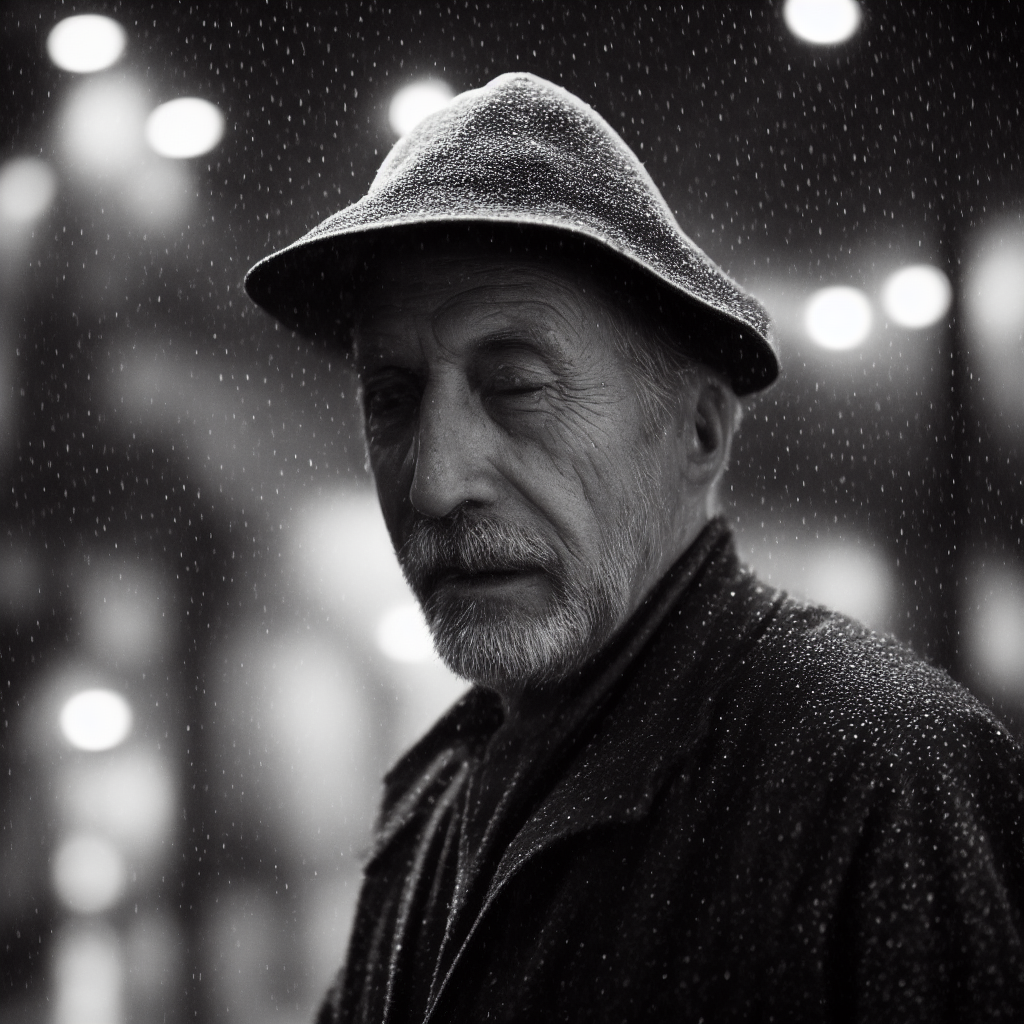

In [3]:
image